In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from os import listdir
import typing

class HSIData():
    def __init__(self, data_path: str=None): 
        if data_path is None:
            DEFAULT_PATH = "./raw_data"
            data_path = DEFAULT_PATH
        self.data = self.get_csv_data(folder_path=data_path)

    def get_csv_data(self, folder_path: str) -> typing.List[pd.DataFrame]:
        data = []
        files_paths = listdir(folder_path)
        for filename in files_paths:
            filepath = folder_path + "/" + filename
            data.append(pd.read_csv(filepath))
        return data

    def __len__(self) -> int: 
        return len(self.data)

    def __getitem__(self, i: int) -> pd.DataFrame: 
        return self.data[i]

    def transform(self): 


In [9]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame, Series
import typing


class AutoRegModel():
    def __init__(self, data: typing.Union[DataFrame, Series], lags: float):
        self.data = data
        self.lags = lags

    def fit(self):
        return self.model.fit()

    def predict(self, lower_limit=None, upper_limit=None):
        if lower_limit is None:
            lower_limit = int(0.5 * len(self.data))
        if upper_limit is None:
            upper_limit = len(self.data)
        input_seq = self.data.loc[0: lower_limit, :]
        result_seq = self.data.loc[lower_limit:, :]
        self.model = AutoReg(input_seq, lags=self.lags)
        self.trained_model = self.model.fit()
        output_seq = self.trained_model.predict(lower_limit+1, upper_limit)
        return output_seq, result_seq


class ARIMAModel():
    def __init__(self, data: typing.Union[DataFrame, Series], order: typing.Union[list, tuple]):
        self.data = data
        self.order = order

    def fit(self, seq):
        return self.model.fit(seq)

    def predict(self, lower_limit=None, upper_limit=None):
        if lower_limit is None:
            lower_limit = len(self.data)-10
        if upper_limit is None:
            upper_limit = len(self.data)
        input_seq = self.data.loc[0: lower_limit, :]
        result_seq = self.data.loc[lower_limit:, :]
        pred = np.array([])
        history = input_seq[:, :]
        for t in len(result_seq): 
            self.model = ARIMA(history, order=self.order)
            self.trained_model = self.model.fit()
            value = self.trained_model.forecast() 
            pred = np.append(pred, value)
            history = np.append(history, result_seq[t])
        return pred




        self.model = ARIMA(input_seq, order=self.order)
        self.trained_model = self.model.fit()
        if self.order == (1, 1, 1) or self.order == [1, 1, 1]:  # ARIMA case???
            output_seq = self.trained_model.predict(lower_limit+1, upper_limit, typ='levels')
        else:
            output_seq = self.trained_model.predict(lower_limit+1, upper_limit)
        return output_seq, result_seq

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from os import listdir
import typing

def get_csv_data(folder_path: str) -> typing.List[pd.DataFrame]:
    data = []
    files_paths = listdir(folder_path)
    for filename in files_paths:
        filepath = folder_path + "/" + filename
        data.append(pd.read_csv(filepath))
    return data

data = get_csv_data("./raw_data")

In [11]:
train_data = data[1]
test_data = data[2]

train_data = train_data[["C"]]
test_data= test_data[["C"]]

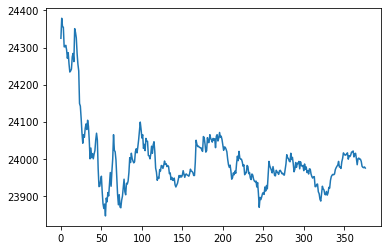

In [26]:
plt.plot(train_data)

C:\Users\Jacky\miniconda3\envs\gpu\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


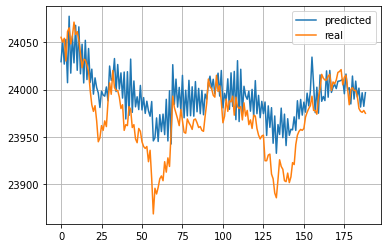

In [108]:
d = data[1]["C"]
t_i = int(0.5 * len(d))
train, test = d[:t_i], d[t_i:]

history = train.to_numpy()
observed = test.to_numpy()
pred = np.array([])
for t in range(len(observed)): 
    model = ARIMA(history, order=(0, 0, 1))
    trained_model = model.fit()
    value = trained_model.forecast() 
    pred = np.append(pred, value)
    history = np.append(history, observed[t])

plt.plot(pred, label="predicted")
plt.plot(observed, label="real")
plt.grid(True)
plt.legend()